# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = po.read_csv(url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)

data = data.dropna(axis=0).reset_index(drop=True)
data.head()

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

In [ ]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_high = DecisionTreeClassifier(criterion= 'entropy', random_state=None, max_depth=10, min_samples_leaf=5)

decision_tree_high.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred = decision_tree_high.predict(X_train)
print('Training Acc is: ', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = decision_tree_high.predict(X_val)
print('Validation Acc is: ', accuracy_score(y_val, y_val_pred)*100)

Training Acc is:  91.60000000000001
Validation Acc is:  73.01587301587301


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_low = DecisionTreeClassifier(criterion= 'entropy', random_state=None, max_depth=5, min_samples_leaf=10)

decision_tree_low.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred = decision_tree_low.predict(X_train)
print('Training Acc is: ', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = decision_tree_low.predict(X_val)
print('Validation Acc is: ', accuracy_score(y_val, y_val_pred)*100)

Training Acc is:  84.0
Validation Acc is:  76.19047619047619


Explain the accuracy results below. 

Our model with a high max depth and a low minimum sample leafs had a higher training accuracy, but lower validation accuracy, then our model with a low max depth and high minimum sample leafs. This means using a higher max depth and a lower minimum sample leafs will lead to overfitting faster, thus for this dataset, it's better to use a lower max depth and a higher minimum sample leafs.

## Metrics

Plot the ROC curve and print the AUC of the second model.

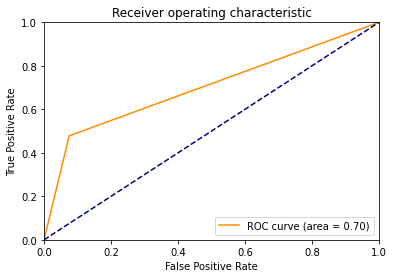

In [ ]:
## YOUR CODE HERE
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic')
plt.show()

Use graphviz to visualize your 2nd tree.

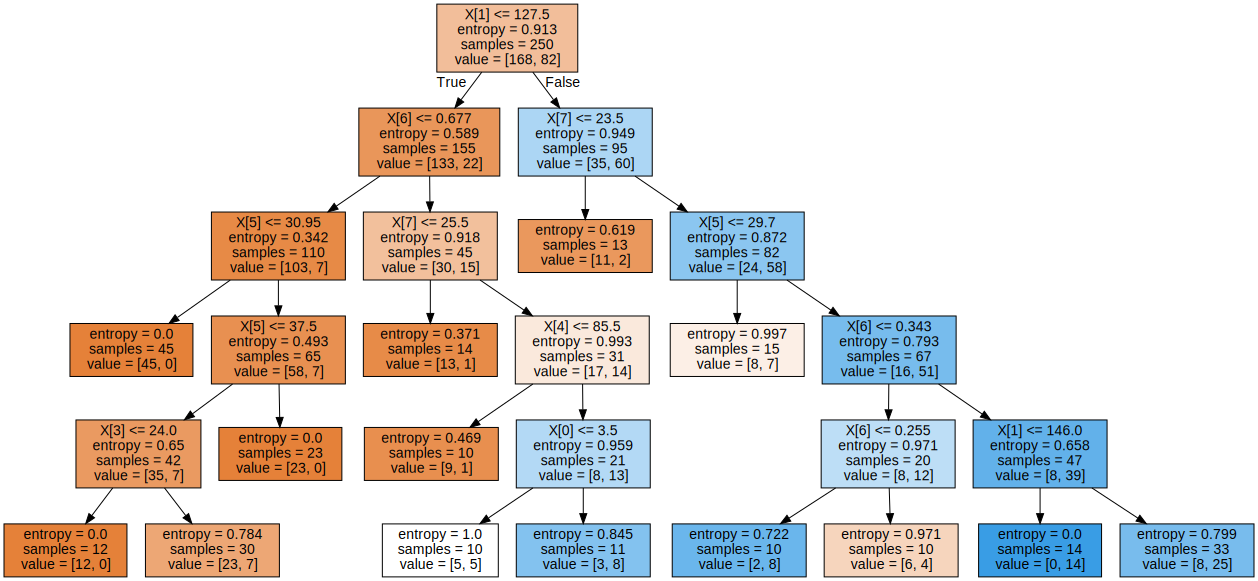

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree_low, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

Values from column from original data

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is X[1] <= 127.5 because it splits the greatest amount of samples into two even groups. So, it splits 250 samples into a group of 168 and a group of 82, effectively dividng the dataset.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

I think it would have a 100% training accuracy, meaning overfitting, and a low validation accuracy. This is because earlier testing with a model of higher max depth and lower minimum sample leafs showed a greater training accuracy and lower validation accuracy. Intuitively, it will cause the model to so many nodes that lead to specific pieces of the training data that unless the validation dataset is the same as the training set, it would perform poorly with never before seen data.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

Training Acc is:  100.0
Validation Acc is:  80.95238095238095


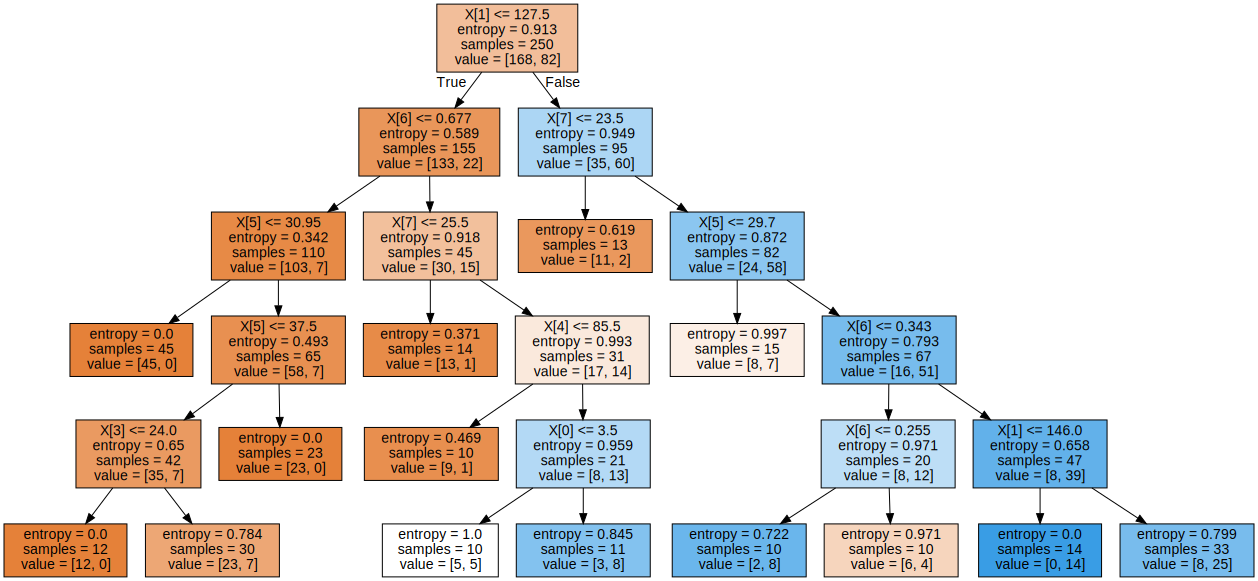

In [ ]:
## YOUR CODE HERE
# Making Decision Tree
decision_tree_supahigh = DecisionTreeClassifier(criterion= 'entropy', random_state=None, max_depth=500, min_samples_leaf=1)
decision_tree_supahigh.fit(X_train, y_train)

# Accuracy
y_train_pred = decision_tree_supahigh.predict(X_train)
print('Training Acc is: ', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = decision_tree_supahigh.predict(X_val)
print('Validation Acc is: ', accuracy_score(y_val, y_val_pred)*100)

# Graph
dot_data = tree.export_graphviz(decision_tree_low, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
randomized_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5)
randomized_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred = randomized_forest.predict(X_train)
print('Training Acc is: ', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = randomized_forest.predict(X_val)
print('Validation Acc is: ', accuracy_score(y_val, y_val_pred)*100)

Training Acc is:  88.8
Validation Acc is:  79.36507936507937


How did the accuracy compare to the decision tree's accuracy?

higher validation accuracy but lower training accuracy

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
importances = randomized_forest.feature_importances_
importances[0:3]

array([0.06748323, 0.31503866, 0.04321238])

Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

<AxesSubplot:title={'center':'Accuracy vs Number of Trees'}, xlabel='trees', ylabel='accuracy (%)'>

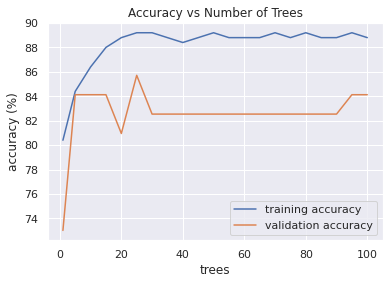

In [ ]:
## YOUR CODE HERE

acc = []
val = []
tree = []

for j in range(21):
    if j == 0:
        trees = 1
    else:
        trees = j*5
    
    random_forest = RandomForestClassifier(n_estimators=trees, max_depth=10, min_samples_leaf=5, random_state=False)
    random_forest.fit(X_train, y_train)

    y_train_pred = random_forest.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)*100
    acc.append(train_acc)
    
    y_val_pred = random_forest.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)*100
    val.append(val_acc)

    tree.append(trees)

df = po.DataFrame([tree, acc, val]).T
df.columns=['trees', 'training accuracy', 'validation accuracy']
df.set_index('trees', inplace=True)

import seaborn as sns
sns.set()
df.plot(title = 'Accuracy vs Number of Trees',ylabel = 'accuracy (%)')

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

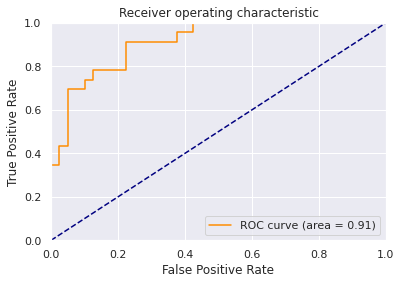

In [ ]:
## YOUR CODE HERE
y_val_pred_forest = random_forest.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred_forest[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30d0b1cb-75d2-4b63-a704-8586d13d003c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>